# Master's thesis coin example

In [7]:
%load_ext autoreload
%autoreload 2

In [23]:
import numpy
import torch
from adaptive_nof1 import *
from adaptive_nof1.policies import *
from adaptive_nof1.helpers import *
from adaptive_nof1.inference import *
from adaptive_nof1.metrics import *
from matplotlib import pyplot as plt
from paretoset import paretoset
from scipy.stats import norm
import seaborn

In [24]:
# We wanna compare the expected outcomes for two different policies:
# We assume Treatment 1 (Normal (0, 0.1), Treatment 2 (Normal(1,0.1))
# 1. a balanced design
# 2. a coin design

In [25]:
length_of_each_treatment = 10

In [52]:
# Design 1
# outcome is the sum of gaussians, therefore we add the \mu and \sigma
outcome_1 = norm(10 * 0 + 10 * 1, 20 * 0.1)

In [55]:
# Design 2 (coin design)
outcome_2a = norm(20 * 0, 20 * 0.1)
outcome_2b = norm(20 * 1, 20 * 0.1)

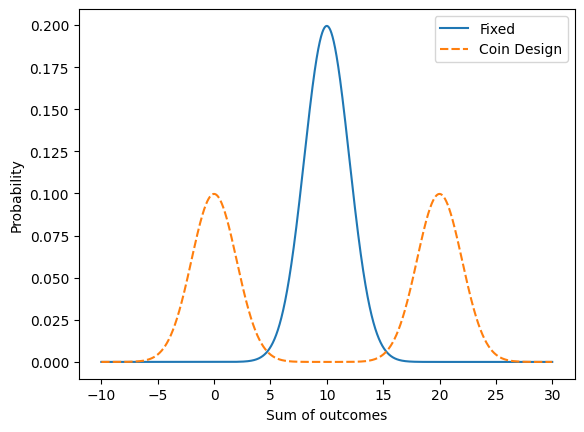

In [59]:
x = np.linspace(-10, 30, 10000)
y_1 = outcome_1.pdf(x)
y_2 = 0.5 * outcome_2a.pdf(x) + 0.5 * outcome_2b.pdf(x)
df = pandas.DataFrame({"Sum of outcomes": x, "Fixed": y_1, "Coin Design": y_2})
df.set_index("Sum of outcomes", inplace=True)
seaborn.lineplot(df)
plt.ylabel("Probability")
plt.savefig("mt_resources/4-main/coin_design.pdf", bbox_inches="tight")